    EXAMINING YOUR DATA
    
    This notebook is a practice and implementation of the basic principles outlined in "Multivariate Data
    Analysis" pdf at this link: https://files.pearsoned.de/inf/ext/9781292035116.
    
    In this book, the authors explain the importance of examining data before performing any form of
    multivariate analysis. Stated, these are:
        - Learning about the variables and any relationships that are existential
        - Identifying the impact of missing data, presence of outliers and testing for statistical assumptions
          relevant to performing any form of multivariate analysis.
          
    However, in this notebook, I will focus my attention to learning about the variables and any relationship
    between them. To be specific, I will illustrate the following techniques of analysis:
        - Univariate Profiling
        - Bivariate Profiling (Metric & Non-metric variables)

    Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline
sns.set()

    Importing the data

In [3]:
malaria_rpt_nums = pd.read_csv('reported_numbers.csv')

In [4]:
malaria_rpt_nums.head()

,Country,Year,No. of cases,No. of deaths,WHO Region
0,Afghanistan,2017,161778.0,10.0,Eastern Mediterranean
1,Algeria,2017,0.0,0.0,Africa
2,Angola,2017,3874892.0,13967.0,Africa
3,Argentina,2017,0.0,1.0,Americas
4,Armenia,2017,0.0,NaN,Europe


In [5]:
# How large is this dataset?
malaria_rpt_nums.shape

(1944, 5)

    1. Univariate Profiling: Examining the shape of the distribution
    
    In this analysis, we perform a single variable analysis using graphic techniques:
        - Graph a Histogram and analyze it's distribution
        - Analyze the characteristics of the shape of the Histogram

/Users/turikumwe/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/turikumwe/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/turikumwe/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/turikumwe/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


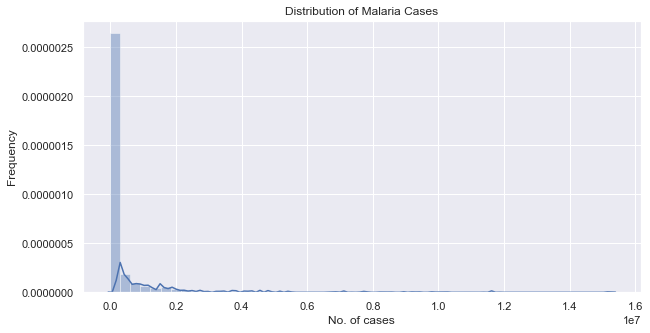

In [6]:
# Draw a "figure" object and an "axes" object
fig, axes = plt.subplots(figsize=(10,5))

# Set a title and axes labels
axes.set_title('Distribution of Malaria Cases')
axes.set_ylabel('Frequency')
axes.set_xlabel('No. of Cases')

# Draw Histogram onto axes
hist = sns.distplot(malaria_rpt_nums['No. of cases'], bins = 50)

    Insights:
    
    - The distribution of "No. of Cases" is not "symetrical." 
    - The distribution is "Skewed" towards the right. (Why is that so?)
    - There is a "concentricity" of data right above zero - most observations have recorded zero cases. 

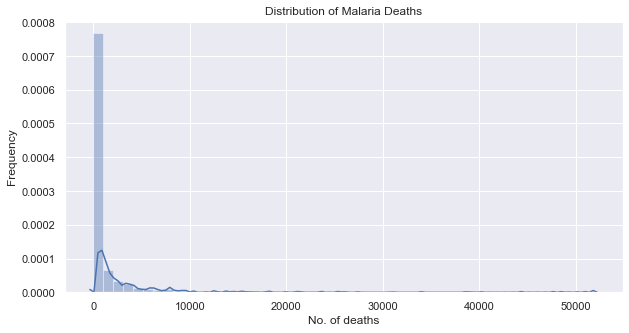

In [7]:
# Creating a "figure" object and "axes" object
fig, axes = plt.subplots(figsize=(10,5))

# Drawing a title and labels to the axes
axes.set_title('Distribution of Malaria Deaths')
axes.set_ylabel('Frequency')
axes.set_xlabel('No. of Deaths')

# Drawing a Histogram on the axes
hist = sns.distplot(malaria_rpt_nums['No. of deaths'], bins = 50)

    Intepretation:
    
    - This distribution is "skewed" towards to the left, hence is not a normal distribution.
    - This distribution shows the presence of "concentricity" right above zero - most of the 
      observations in the distribution recorded deaths between 0 and 5000.

    2. Bivariate Profiling: Examining the relationship between the variables
    
    In this analysis, we show analyze variable relationships using graphing techniques:
        - Graph a scatterplot and analyze it's strength and direction of the relationship.

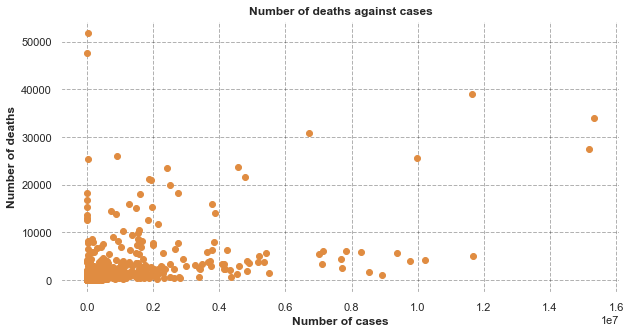

In [28]:
# Analyze the relationship between No. of Cases and No. of Deaths

# Create "figure" and "axes" objects
fig, axes = plt.subplots(figsize=(10,5))

# Drawing a scatterplot
x = malaria_rpt_nums['No. of cases']
y = malaria_rpt_nums['No. of deaths']
scatter = plt.scatter(
    x, 
    y, 
    c='#E08C41'
)

# Adding a title and axes labels
axes.set_title('Number of deaths against cases', fontweight='bold', fontsize=12)
axes.set_ylabel('Number of deaths', fontweight='bold', fontsize=12)
axes.set_xlabel('Number of cases', fontweight='bold', fontsize=12)

# Changing the facecolor
axes.set_facecolor('#FFFFFF')

# Adding gridlines to the axes
axes.grid(
    b = True,
    color = '#000000',
    alpha = 0.3,
    ls = '--',
    in_layout = False
)

    Intepretation:
    
        - Relationship: A weak positive relationship seems to exist.
        - Pattern: As the number of cases increase, so does the number of deaths.

    3. Bivariate Profiling: Examining the Group Differences
        
    In this analysis, we will use the following graphic techniques:
        - Box-wisker plots: Analyze measures positions relative to each other
        - Objective: Examine distributions of metric and non-metric values

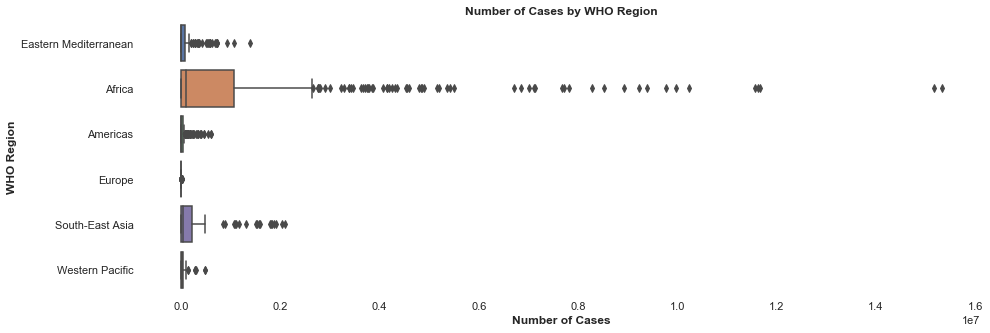

In [42]:
# Analyzing No. of Cases per WHO Regions

# Create figure and axes objects
fig, axes = plt.subplots(figsize=(15, 5))

# Drawing the boxplots on the axes
y = malaria_rpt_nums['WHO Region']
x = malaria_rpt_nums['No. of cases']
box_plots = sns.boxplot(x, y)

# Adding a title and labels
axes.set_title('Number of Cases by WHO Region', fontweight='bold', fontsize=12)
axes.set_ylabel('WHO Region', fontweight='bold', fontsize=12)
axes.set_xlabel('Number of Cases', fontweight='bold', fontsize=12)

# Changing the facecolor
axes.set_facecolor('#FFFFFF')

    Intepretation:
    
    - Africa reported more malaria cases than any other region.
    - Africa and Southeast Asia indicate the presence of outliers in the number of cases, and as well as 
      Eastern Mediterranean and Western Pacific.
    - The mean distribution (number of cases) of all regions in close to zero. (Most countries reported zero).
    
    - Europe reported a record small number of malaria cases than any other region.

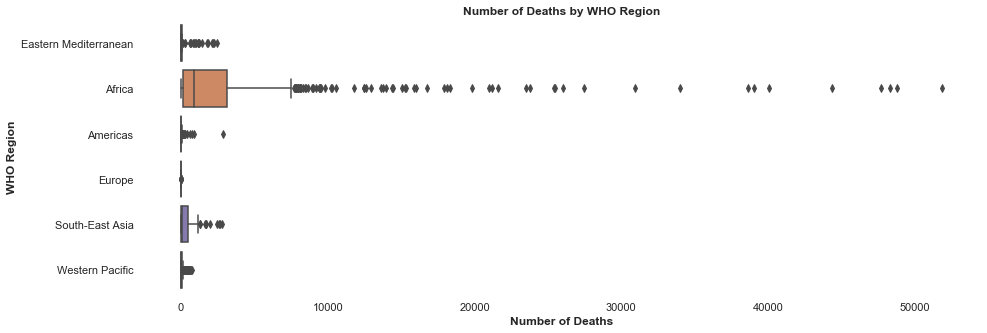

In [43]:
# Analyzing No. of Deaths per WHO Regions

# Create figure and axes objects
fig, axes = plt.subplots(figsize=(15, 5))

# Drawing the boxplots on the axes
y = malaria_rpt_nums['WHO Region']
x = malaria_rpt_nums['No. of deaths']
box_plots = sns.boxplot(x, y)

# Adding a title and labels
axes.set_title('Number of Deaths by WHO Region', fontweight='bold', fontsize=12)
axes.set_ylabel('WHO Region', fontweight='bold', fontsize=12)
axes.set_xlabel('Number of Deaths', fontweight='bold', fontsize=12)

# Changing the facecolor
axes.set_facecolor('#FFFFFF')

    Intepretation:
    
    - Africa reported a record higher number of deaths compared to any other region.
    - Eastern Mediterranean and Southeast Asia followed in reporting a record number of deaths after Africa.
    - Africa, Eastern Mediterranean and Southeast Asia indicate the presence of outliers.
    - Europe, as expected, recorded the least number of deaths.

    CONCLUSION FROM THIS EXERCISE
    
    By performing this short analysis, the following is what could be concluded from it before applying any
    form of multivariate analysis:
    
        - The distributions indicated the lack of normality in the number of deaths and cases, hence requiring
        some form of normalization techniques, so as to make the distribution normal.
        
        - The scatterplots in bivariate analysis indicated the relationship between number of deaths and number
        of cases which could be considered in any multivaraite analysis, so as to avoid any biases in results.
        Depending on how strong the relationship is, the relationships could inform the type of analysis
        performed on them.
        
        - With the boxplots, we were able to see how the different metric variables are distributed with a 
        non-metric variable. This could aid us in understanding where the malaria is prevelent, and also 
        indicates the presence of outliers within the dataset.
        
    Note:
    
    More code have been done in examining the data, but this short exercise forms the foundation of any analysis.
    It is important to also note that this is note a comprehensive analysis, but very basic.